In [2]:
from mpl_toolkits import mplot3d 
import numpy as np 
import matplotlib.pyplot as plt
from analysis import * 
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

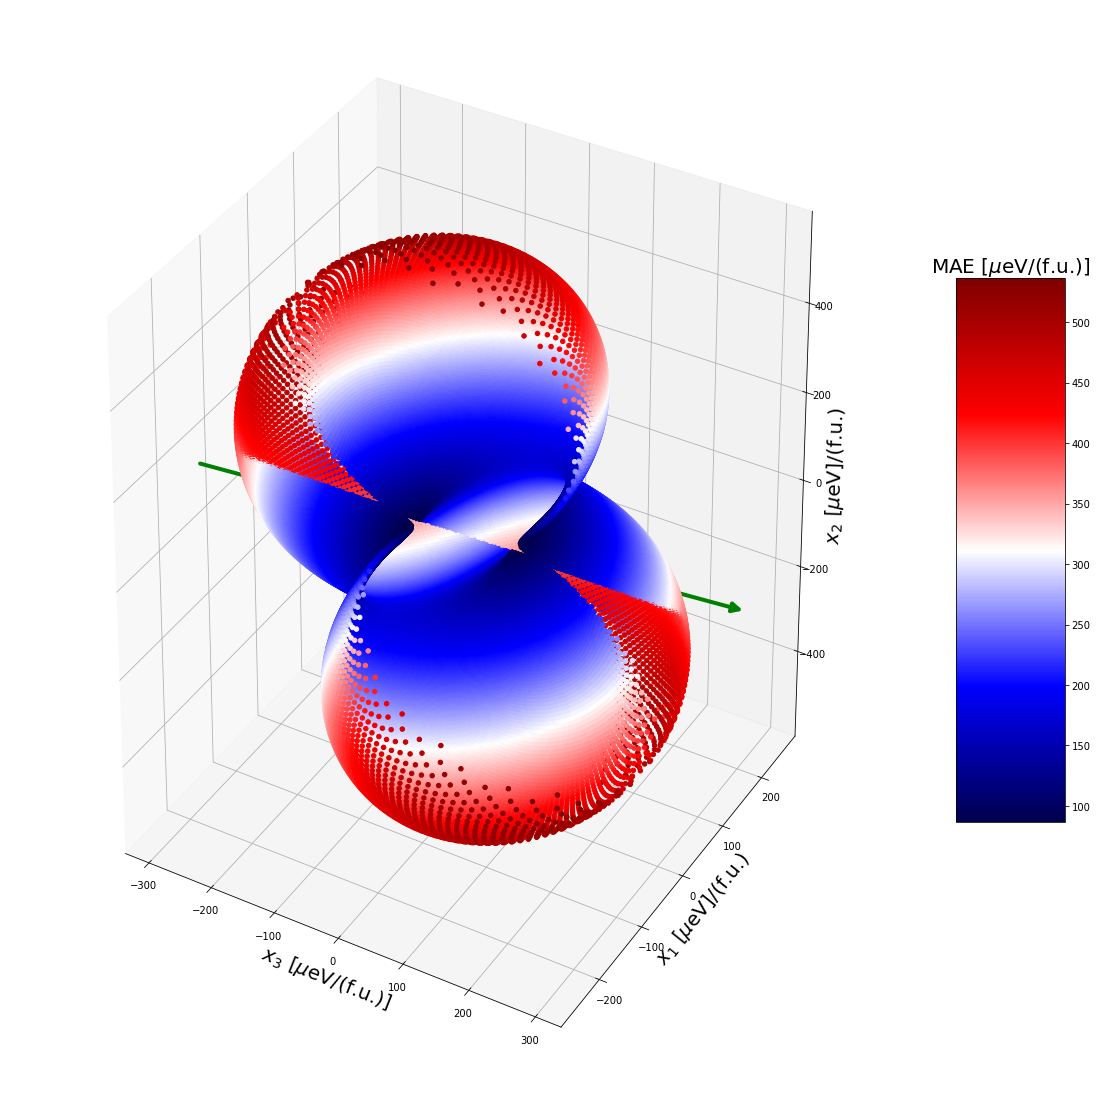

In [3]:
#### Dataset 1 
npts = 90000
k0_1 = 86.8502 
k2_1 = np.array([[86.8502,0.51398,-0.95367],[0.51398,423.24,-106.166],[-0.95367,-106.166,26.4497]])
[mae_x_1,mae_y_1,mae_z_1] = make_points_maefit_2order(npts, k0_1, k2_1)
mae_1=[] 
for i in range(len(mae_x_1)): 
    mae_1.append(np.linalg.norm(np.array([mae_x_1[i], mae_y_1[i], mae_z_1[i]])))
mae_1 = np.array(mae_1)
mae_x_1 = np.array(mae_x_1)
mae_y_1 = np.array(mae_y_1)
mae_z_1 = np.array(mae_z_1)

mae_x_1_calc = np.loadtxt("mae_x_1.txt")
mae_y_1_calc = np.loadtxt("mae_y_1.txt")
mae_z_1_calc = np.loadtxt("mae_z_1.txt")

fig = plt.figure(figsize = (20, 20)) 
ax = fig.gca(projection='3d')
my_cmap = plt.get_cmap('seismic') 
sctt = ax.scatter3D(mae_z_1, mae_x_1, mae_y_1, alpha = 1, c = mae_1[0:len(mae_1)],  
                  cmap = my_cmap) 
#sctt2 = ax.scatter3D(mae_z_1_calc, mae_x_1_calc, mae_y_1_calc , s=50 ,color='black', marker ='o')
clb = fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5) 
clb.ax.set_title('MAE [$\mu$eV/(f.u.)]', fontsize=20)
arrow =  Arrow3D([-400,400], [-400*0.09, 400*0.09], [0, 0], mutation_scale=20, lw=4, arrowstyle="-|>", color="g")
ax.add_artist(arrow)
plt.draw() 
ax.set_xlabel('$x_{3}$ [$\mu$eV/(f.u.)]', fontsize=20)  
ax.set_ylabel('$x_{1}$ [$\mu$eV]/(f.u.)', fontsize=20)  
ax.set_zlabel('$x_{2}$ [$\mu$eV]/(f.u.)', fontsize=20)
plt.savefig('bwo_Fe_W_mae.png')
plt.show()

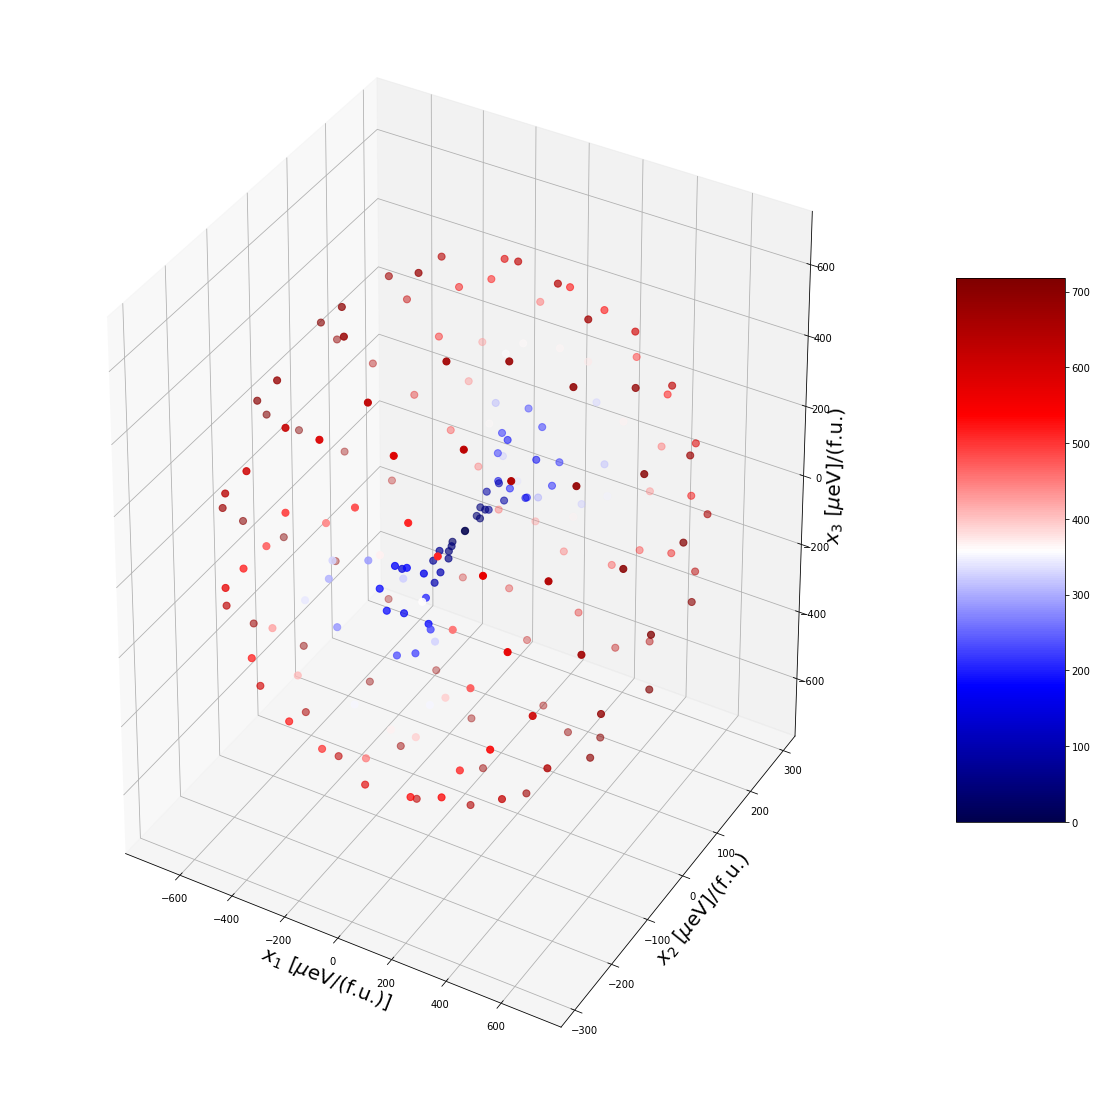

In [15]:
mae_x_2_calc = np.loadtxt("mae_x_4.txt")
mae_y_2_calc = np.loadtxt("mae_y_4.txt")
mae_z_2_calc = np.loadtxt("mae_z_4.txt")
fig = plt.figure(figsize = (20, 20)) 
ax = fig.gca(projection='3d')
my_cmap = plt.get_cmap('seismic') 
mae_calc = np.array([mae_x_2_calc, mae_y_2_calc, mae_z_2_calc]) 
mae_calc = mae_calc.T
mae_norm = np.linalg.norm(mae_calc, axis=1)
stt = ax.scatter3D(mae_x_2_calc, mae_y_2_calc, mae_z_2_calc, s=50 , marker ='o',c = mae_norm, cmap = my_cmap)
clb = fig.colorbar(stt, ax = ax, shrink = 0.5, aspect = 5) 
#arrow =  Arrow3D([400*0.0329,-400*0.0329], [-400*0.9644, 400*0.9644], [400*0.2625, 400*0.2625], mutation_scale=20, lw=4, arrowstyle="-|>", color="g")
#ax.add_artist(arrow)
#plt.draw() 
ax.set_xlabel('$x_{1}$ [$\mu$eV/(f.u.)]', fontsize=20)  
ax.set_ylabel('$x_{2}$ [$\mu$eV]/(f.u.)', fontsize=20)  
ax.set_zlabel('$x_{3}$ [$\mu$eV]/(f.u.)', fontsize=20)
plt.show()

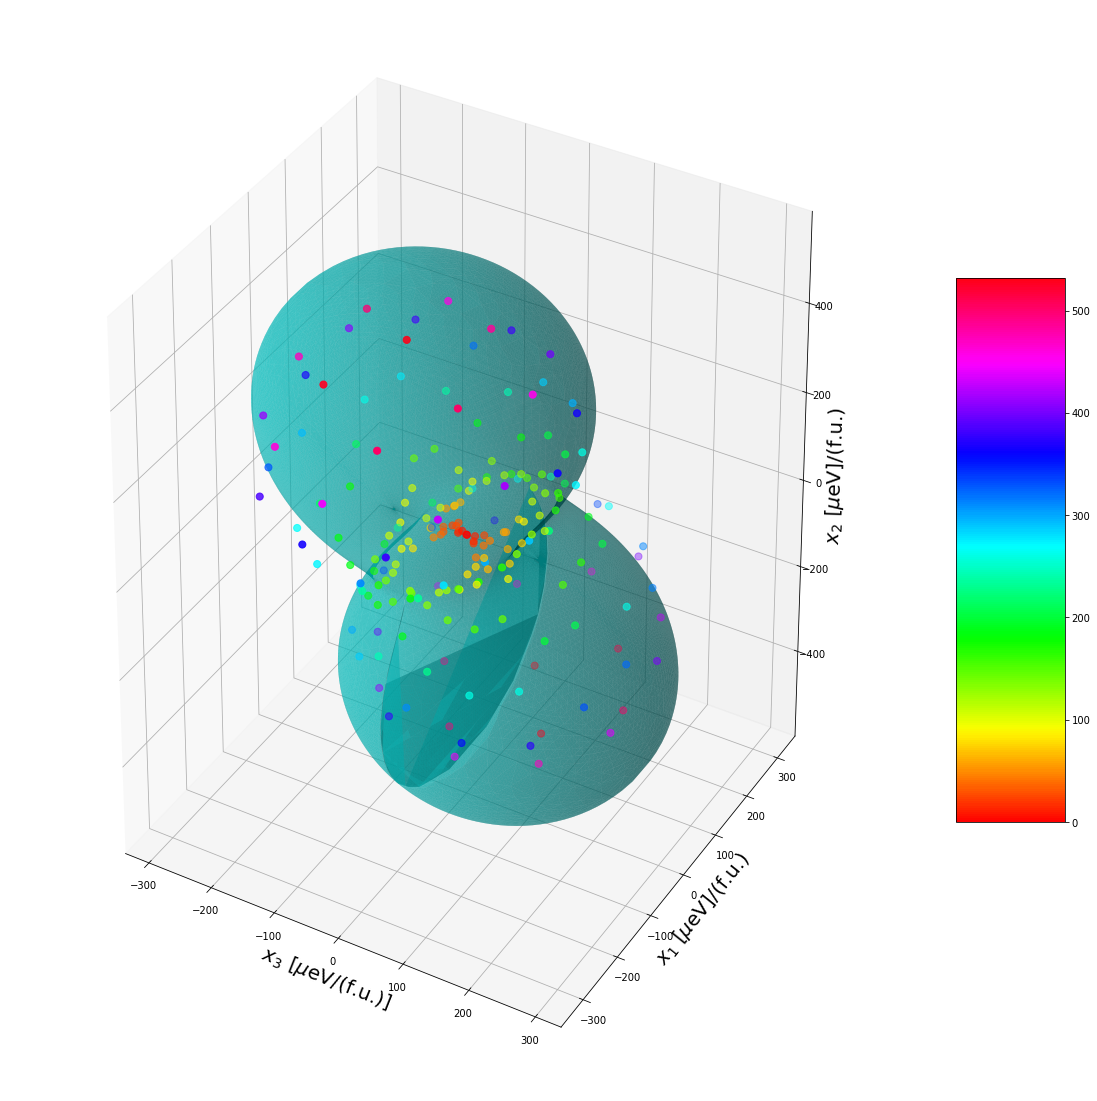

In [68]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.tri as mtri


rad = np.linalg.norm([mae_x_1, mae_y_1,mae_z_1], axis=0)
zen = np.arccos(mae_x_1 / rad)
azi = np.arctan2(mae_z_1, mae_y_1)

mae_calc = np.array([mae_x_1_calc, mae_y_1_calc, mae_z_1_calc]) 
mae_calc = mae_calc.T
mae_norm = np.linalg.norm(mae_calc, axis=1)


tris = mtri.Triangulation(zen, azi)
fig = plt.figure(figsize = (20, 20))
my_cmap = plt.get_cmap('hsv')
ax  = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(mae_z_1, mae_x_1, mae_y_1, triangles=tris.triangles,color='c', alpha=0.5)
stt = ax.scatter3D(mae_z_1_calc, mae_x_1_calc, mae_y_1_calc, s=50 , marker ='o',c = mae_norm, cmap = my_cmap)
clb = fig.colorbar(stt, ax = ax, shrink = 0.5, aspect = 5) 
#arrow =  Arrow3D([-400,400], [-400*0.09, 400*0.09], [0, 0], mutation_scale=20, lw=4, arrowstyle="-|>", color="k")
#ax.add_artist(arrow)
#plt.draw() 
ax.set_xlabel('$x_{3}$ [$\mu$eV/(f.u.)]', fontsize=20)  
ax.set_ylabel('$x_{1}$ [$\mu$eV]/(f.u.)', fontsize=20)  
ax.set_zlabel('$x_{2}$ [$\mu$eV]/(f.u.)', fontsize=20)
plt.show()


# Convert polar (radii, angles) coords to cartesian (x, y) coords.
# (0, 0) is manually added at this stage,  so there will be no duplicate
# points in the (x, y) plane.
# x = mae_x_1
# y = mae_y_1

# # Compute z to make the pringle surface.
# z =mae_z_1

# fig = plt.figure(figsize = (20, 20)) 
# ax = fig.gca(projection='3d')

# ax.plot_trisurf(y, x, z, linewidth=0.02, antialiased=True)

# plt.show()

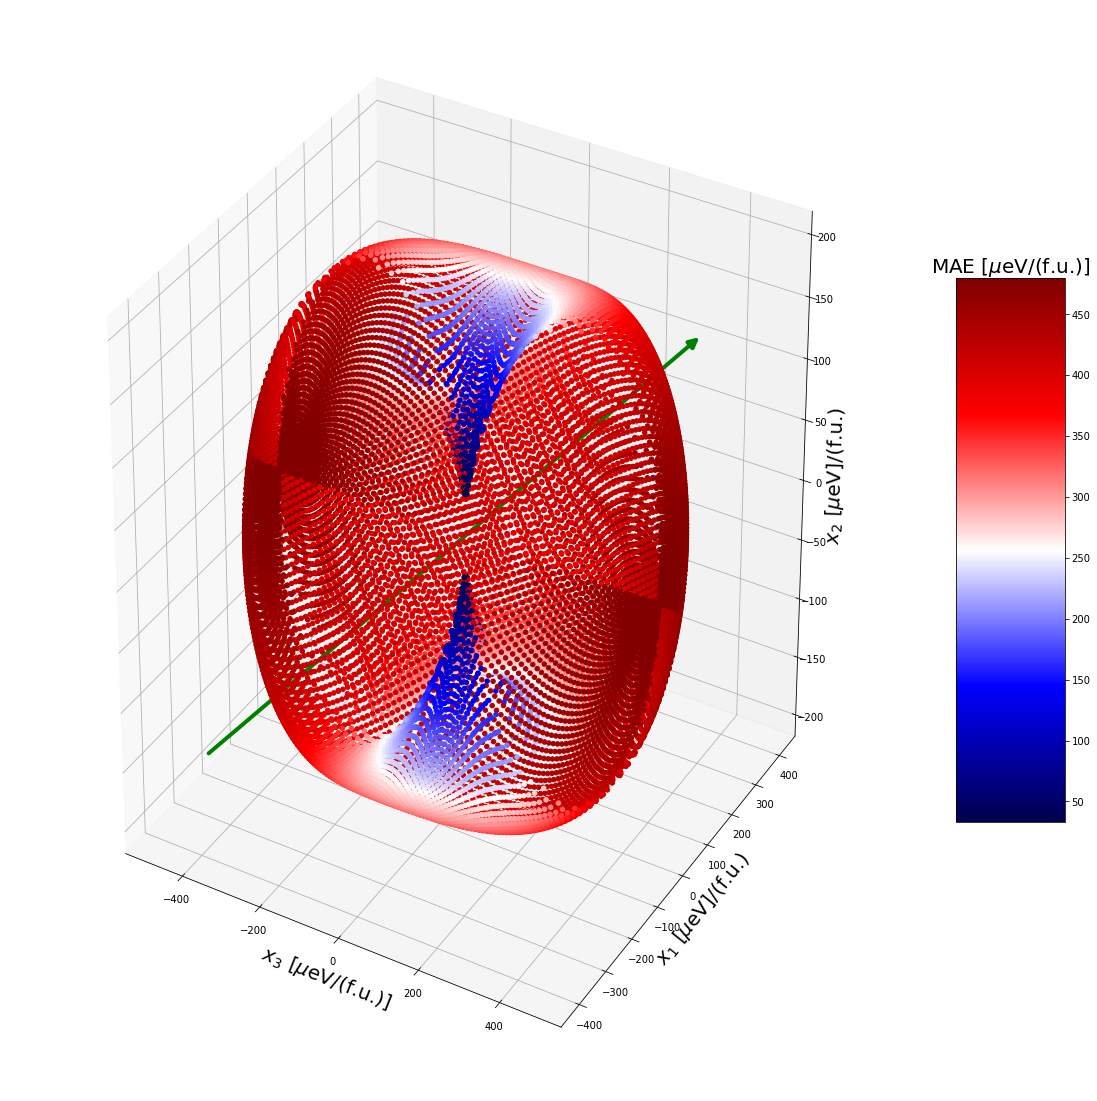

In [17]:
#### Dataset 3 
npts = 20000
k0_3 = 132.113 
k2_3 = np.array([[275.845,0.0408972,0.299345],[0.0408972,-101.396,0.299345],[0.299345,0.299345,347.049]])
[mae_x_3,mae_y_3,mae_z_3] = make_points_maefit_2order(npts, k0_3, k2_3)
mae_3=[] 
for i in range(len(mae_x_3)): 
    mae_3.append(np.linalg.norm(np.array([mae_x_3[i], mae_y_3[i], mae_z_3[i]])))
mae_3 = np.array(mae_3)
mae_x_3 = np.array(mae_x_3)
mae_y_3 = np.array(mae_y_3)
mae_z_3 = np.array(mae_z_3)

mae_x_3_calc = np.loadtxt("mae_x_3.txt")
mae_y_3_calc = np.loadtxt("mae_y_3.txt")
mae_z_3_calc = np.loadtxt("mae_z_3.txt")

fig = plt.figure(figsize = (20, 20)) 
ax = fig.gca(projection='3d')
my_cmap = plt.get_cmap('seismic') 
sctt = ax.scatter3D(mae_z_3, mae_x_3, mae_y_3, alpha = 1, c = mae_3[0:len(mae_3)],  
                   cmap = my_cmap) 
#sctt2 = ax.scatter3D(mae_z_3_calc, mae_x_3_calc, mae_y_3_calc , s=50 ,color='black', marker ='o')
clb = fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5) 
clb.ax.set_title('MAE [$\mu$eV/(f.u.)]', fontsize=20)
arrow =  Arrow3D([-700*0.2288,700*0.228], [-700*0.9724,700*0.9724], [-0.045*700, 0.045*700], mutation_scale=20, lw=4, arrowstyle="-|>", color="g")
ax.add_artist(arrow)
plt.draw() 
ax.set_xlabel('$x_{3}$ [$\mu$eV/(f.u.)]', fontsize=20)  
ax.set_ylabel('$x_{1}$ [$\mu$eV]/(f.u.)', fontsize=20)  
ax.set_zlabel('$x_{2}$ [$\mu$eV]/(f.u.)', fontsize=20)
plt.savefig('bwo_Mn4_W_mae.png')
plt.show()


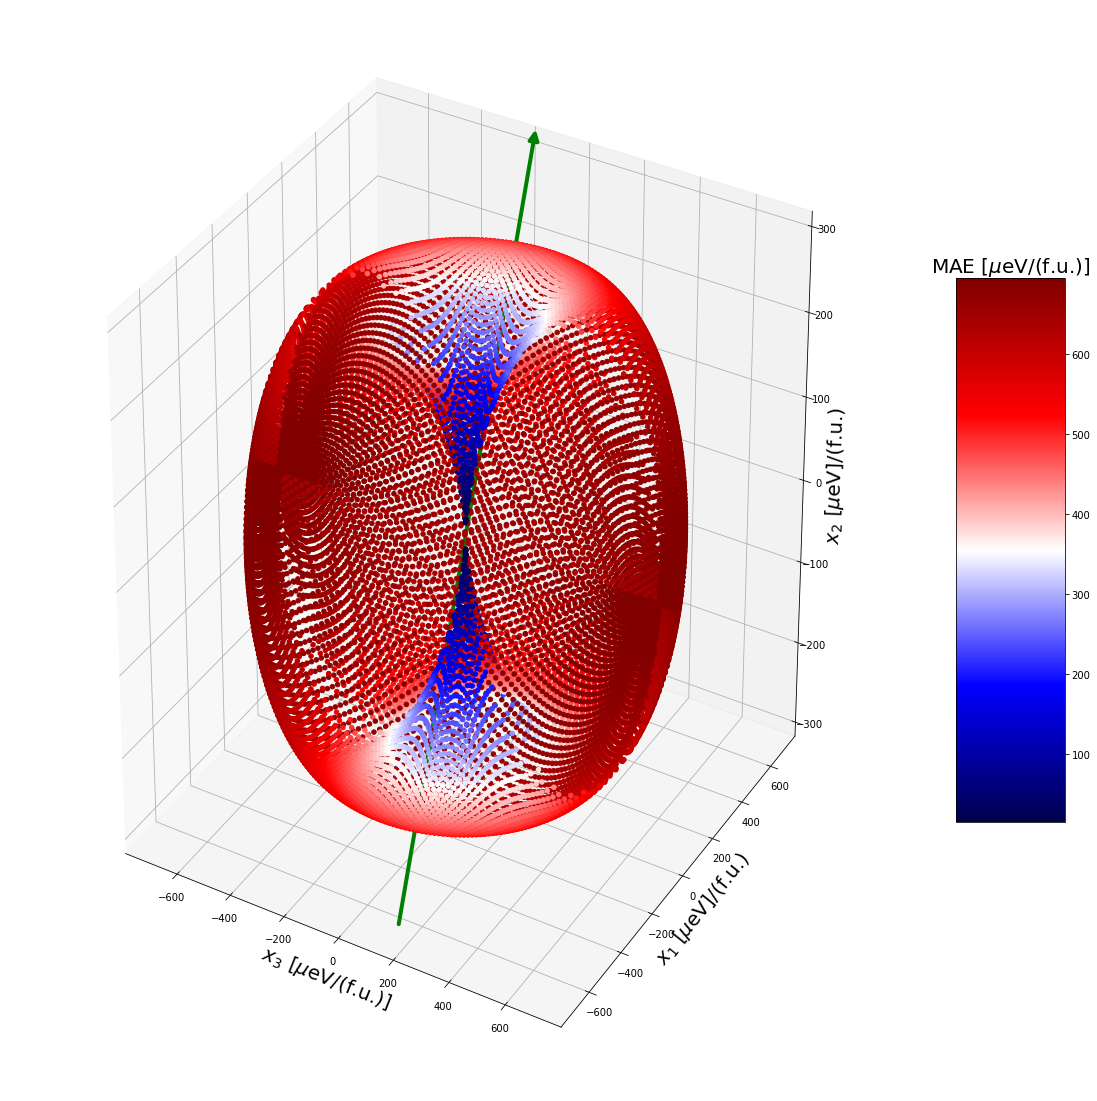

In [18]:
#### Dataset 4 
npts = 20000
k0_4 = 190.593 
k2_4 = np.array([[483.771,-0.401015,-1.2596],[-0.401015,-179.512,13.944],[-1.2596,13.944,504.062]])
[mae_x_4,mae_y_4,mae_z_4] = make_points_maefit_2order(npts, k0_4, k2_4)
mae_4=[] 
for i in range(len(mae_x_4)): 
    mae_4.append(np.linalg.norm(np.array([mae_x_4[i], mae_y_4[i], mae_z_4[i]])))
mae_4 = np.array(mae_4)
mae_x_4 = np.array(mae_x_4)
mae_y_4 = np.array(mae_y_4)
mae_z_4 = np.array(mae_z_4)

mae_x_4_calc = np.loadtxt("mae_x_4.txt")
mae_y_4_calc = np.loadtxt("mae_y_4.txt")
mae_z_4_calc = np.loadtxt("mae_z_4.txt")

fig = plt.figure(figsize = (20, 20)) 
ax = fig.gca(projection='3d')
my_cmap = plt.get_cmap('seismic') 
sctt = ax.scatter3D(mae_z_4, mae_x_4, mae_y_4, alpha = 1, c = mae_4[0:len(mae_4)],  
                   cmap = my_cmap) 
#sctt2 = ax.scatter3D(mae_z_4_calc, mae_x_4_calc, mae_y_4_calc , s=50 ,color='black', marker ='o')
clb = fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5) 
clb.ax.set_title('MAE [$\mu$eV/(f.u.)]', fontsize=20)
arrow =  Arrow3D([-5000*0.0146,5000*0.0146], [-300, 300], [-0.085*5000, 5000*0.085], mutation_scale=20, lw=4, arrowstyle="-|>", color="g")
ax.add_artist(arrow)
plt.draw() 
ax.set_xlabel('$x_{3}$ [$\mu$eV/(f.u.)]', fontsize=20)  
ax.set_ylabel('$x_{1}$ [$\mu$eV]/(f.u.)', fontsize=20)  
ax.set_zlabel('$x_{2}$ [$\mu$eV]/(f.u.)', fontsize=20)
plt.savefig('bwo_Mn4_Bi_mae.png')
plt.show()